## Regresión Lineal
##### Implementada con python con vectorización


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Obtenemos los datos de un csv que está en github creando un dataFrame
url = 'https://raw.githubusercontent.com/adrishg/PythonML-PrebecariosProteco/master/DataSets/regresionLineal.csv'
datos = pd.read_csv(url)
datos.tail()

,poblacion,beneficio
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510
96,5.4369,0.61705


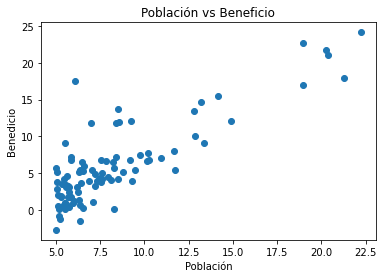

In [3]:
#Creamos los vectores X y Y que contienen los datos del dataFrame creado a partir del csv
X = datos.poblacion.values
Y = datos.beneficio.values

#Creamos una gráfica de dispersión con dichos datos
plt.scatter(X,Y)

#Asignamos titulos a "x" y "y"
plt.xlabel('Población')
plt.ylabel('Benedicio')

#Asignamos un título a la gráfica
plt.title('Población vs Beneficio')

#Mostramos la gráfica
plt.show()

## Empezamos regresión lineal

Requerimientos para implementar la regresión lineal:


1) Separar los datos 

2) Función de hipótesis 

3) Función de costo 

4) Gradiente de la funcion de costos 

5) Gradiente de descenso 

6) Probar el modelo 



In [0]:
#Función para separa los datos para entrenar el modelo (Training) y para probar el modelo (Test)
def separacionDatosTestTraining(x, y, tamanioTest=0.2):
    tamanioDatos= y.size
    t= int(tamanioTest * tamanioDatos)
    datosTest= np.random.choice(tamanioDatos, t) #Indices/Coeficientes de datos a retirar para el training
    datosTraining= np.setdiff1d( np.arange(tamanioDatos), datosTest)
    
    return x[datosTraining], y[datosTraining], x[datosTest], y[datosTest]  

In [0]:
#La función de hipótesis
def funcionDeHipotesis(x, theta):
  h = x @ theta #@implica multiplicación de matrices
  return h

In [0]:
def funcionDeCosto(x, y, theta):
  h = funcionDeHipotesis(x, theta)
  m = y.size
  d = y - h
  j = d @ d / (2 * m)
  return j

In [0]:
def gradienteCostos(x, y, theta):
    m = y.size
    h = funcionDeHipotesis(x, theta)
    dj = ((h - y) @ x) / m
    return dj

In [0]:
def gradienteDescenso(x, y, alfa, E = 0.001):
  m = y.size
  #Añadimos otra columna a x ya que deberemos hacer comparaciones con el vector de theta que siempre nos dará un parámetro más 
  x = np.hstack([np.ones([m, 1]), x]) 
  n = x.shape[1]

  #Esto es para generalizar el algoritmo y no sólo sirva para regresión lineal simple sigo para n parámetros de theta
  theta = np.zeros([n])

  costoAnterior = funcionDeCosto(x, y, theta)
  theta = theta - alfa * gradienteCostos(x, y, theta)
  costoActual = funcionDeCosto(x, y, theta)

  diferencia = abs(costoActual - costoAnterior)

  iteraciones = [0, 1]
  historialCostos = [costoAnterior, costoActual]
  i = 2

  while diferencia > E:  # Mientras no converga
    costoAnterior = costoActual
    theta = theta - alfa * gradienteCostos(x, y, theta)
    costoActual = funcionDeCosto(x, y, theta)

    diferencia = abs(costoActual - costoAnterior)

    iteraciones.append(i)
    historialCostos.append(costoActual)
    i += 1

  plt.plot(iteraciones, historialCostos)
  plt.title('Funcion de costo respecto a las iteraciones')
  plt.xlabel('Iteraciones')
  plt.ylabel('costo')
  print("Ultimo costo:", historialCostos[-1])
  plt.show()
  return theta

(97, 1)
Ultimo costo: 6.897537272190391


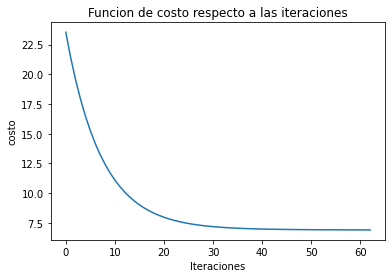

array([0.03727436, 0.6960893 ])

In [16]:
alfa = 0.001
print(X.shape)
#Esto resuelve el problema de shapes
X = X.reshape([Y.size, 1])
x_test, y_test, x_train, y_train = separacionDatosTestTraining(X, Y)
theta = gradienteDescenso(x_train, y_train, alfa)

#Ultimo costo: 32.07273387745137
#Ultimo costo: 5.8905509018978295
theta

In [17]:

x_test = np.hstack([np.ones([y_test.size, 1]), x_test])
print("Costo:", funcionDeCosto(x_test, y_test, theta))



Costo: 6.062933902241215


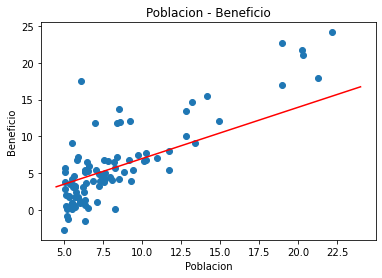

In [18]:
X = datos.poblacion.values 
Y =datos.beneficio.values
plt.scatter(X, Y)

x = np.linspace(4.5, 24)
y = theta[0] + theta[1] * x
plt.plot(x, y, 'r')
plt.xlabel('Poblacion')
plt.ylabel('Beneficio')
plt.title('Poblacion - Beneficio')
plt.show()